<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

### Data Understanding 

### Project Title: Building a Machine Learning Model to Predict Sepsis Status

### Hypothesis
### Null Hypothesis: Patients within the age range of 20 to 40 do not have sepsis
### Alternate Hypothesis: Patients withing the age range of 20 to 40 have sepsis

### Research Questions
1. Is there any correlation between the various features and the sepsis status?
2. Which age range has the highest number of positive sepsis status?
3. Are the variations in the different blood work results?
4. Which of the features are hightly correlated? 
5. Do they contribute to the sepsis status?

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...
# %pip install plotly

In [2]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import scatter_matrix


# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,\
precision_score, recall_score, fbeta_score, make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression




# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

# Other packages
import os

#importing warning
import warnings
warnings.filterwarnings('ignore')


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [4]:
# For CSV, use pandas.read_csv
# loading train and test data
train_data=pd.read_csv('Paitients_Files_Train.csv')
test_data=pd.read_csv('Paitients_Files_Test.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [5]:
# checking the train dataset
train_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [6]:
#check data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [7]:
#check shape of data
train_data.shape

(599, 11)

In [8]:
#check null values
train_data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [9]:
#check for duplicates
train_data.duplicated().sum()

0

In [10]:
#check unique values
train_data.nunique()

ID           599
PRG           17
PL           129
PR            44
SK            51
TS           164
M11          233
BD2          437
Age           50
Insurance      2
Sepssis        2
dtype: int64

In [11]:
#renaming column names to make it understandable

train_data.rename(columns = {'PRG':'Plasma glucose', 'PL':'Blood Work Result-1',
                              'PR':'Blood Pressure', 'SK':'Blood Work Result-2', 'TS':'Blood Work Result-3', 'M11':'Body mass index', 
                             'BD2':'Blood Work Result-4','Sepssis':'Sepsis'}, inplace = True)

In [12]:
#check renamed columns
train_data.head()

,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


### Summary of train data information
1. There are 599 rows and 11 columns
2. There are no null values and duplicates
3. There are 599 unique values in the ID column, 2 unique values in both Insurance and Sepsis column
4. Abbreviated names were renamed for more clarity

In [13]:
#checking test dataset
test_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [14]:
#check test data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [15]:
#check shape of test data
test_data.shape

(169, 10)

In [16]:
#check null values
test_data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [17]:
#check duplicates in test data
test_data.duplicated().sum()

0

In [18]:
#check unique values
test_data.nunique()

ID           169
PRG           14
PL            85
PR            33
SK            36
TS            66
M11          122
BD2          156
Age           39
Insurance      2
dtype: int64

In [19]:
#rename columns
test_data.rename(columns = {'PRG':'Plasma glucose', 'PL':'Blood Work Result-1',
                              'PR':'Blood Pressure', 'SK':'Blood Work Result-2', 'TS':'Blood Work Result-3', 'M11':'Body mass index', 
                             'BD2':'Blood Work Result-4'}, inplace = True)
test_data.head()

,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


### Summary of test data information
1. There are 169 rows and 11 columns
2. There are no null values and duplicates
3. There are 169 unique values in the ID column, 2 unique values in Insurance column
4. Abbreviated names were renamed for more clarity

### Answering Research Questions

In [20]:
#descriptive statistics of the train data 
train_data.describe()

,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
#check the counts of the target feature
counts = train_data['Sepsis'].value_counts()
print(counts)

Negative    391
Positive    208
Name: Sepsis, dtype: int64


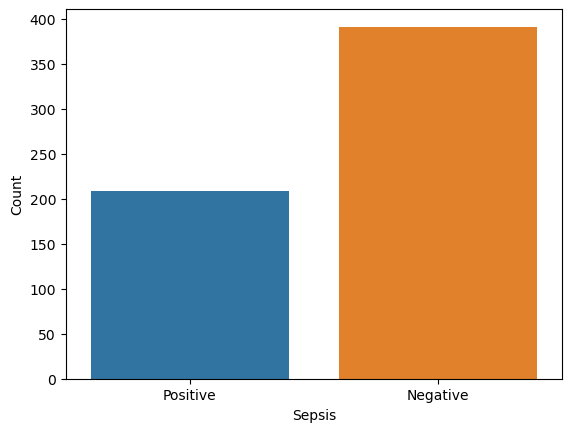

In [22]:
# Create count plot on "Sepsis" column
sns.countplot(x="Sepsis", data=train_data)

# Add axis labels
plt.xlabel("Sepsis")
plt.ylabel("Count")

# Show plot
plt.show()

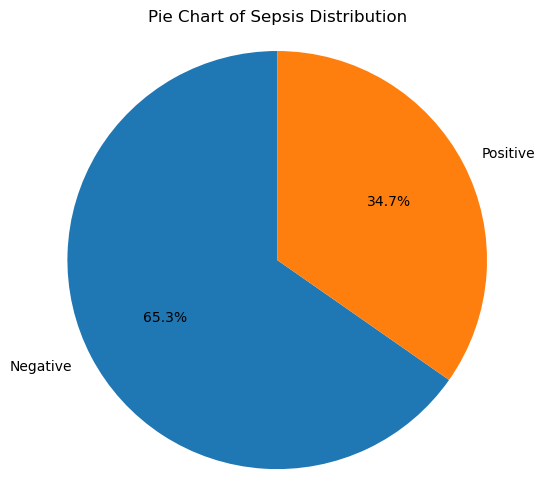

In [23]:
#  Calculate the value counts of the "Sepsis" column
class_counts =train_data['Sepsis'].value_counts(normalize=True)

# Create a pie chart of the values in the 'Sepsis' column
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Chart of Sepsis Distribution')

# Show the chart
plt.show()

#### In-depth view of target feature 
The target feature is imbalanced with 65.3% of negative and 34.7% of positives

#### Answering Q1. Is there any correlation between the various features and the sepsis status?

In [24]:
#create a copy of the train data
train_copy=train_data.copy()

In [25]:
#  change values in churn column into numerical data
train_copy['Sepsis'] = (train_copy['Sepsis'] == 'Positive').astype(bool).astype(int)
train_copy['Sepsis'].unique()

array([1, 0])

In [26]:
#drop the ID column 
train_copy= train_copy.drop([ 'ID'], axis = 1)

In [27]:
#create a correlation matrix
corr_matrix = train_copy.corr()

In [28]:
#check how feature correlate with target (Sepsis)
corr_matrix['Sepsis'].sort_values(ascending=False)


Sepsis                 1.000000
Blood Work Result-1    0.449719
Body mass index        0.315894
Age                    0.210234
Plasma glucose         0.207115
Blood Work Result-4    0.181561
Blood Work Result-3    0.145892
Blood Work Result-2    0.075585
Insurance              0.062582
Blood Pressure         0.061086
Name: Sepsis, dtype: float64

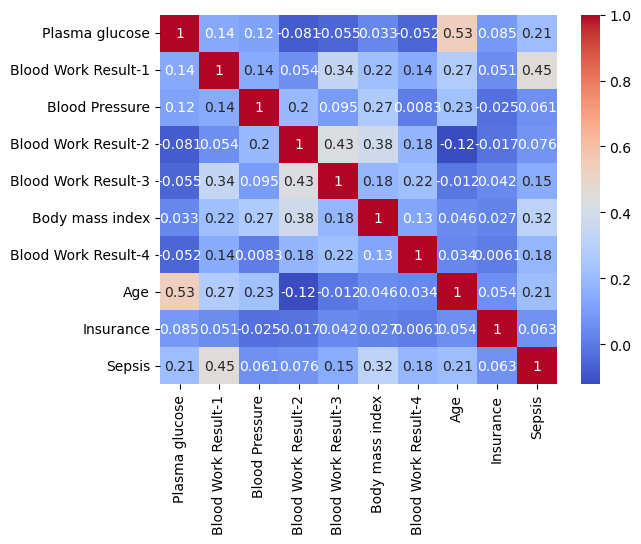

In [29]:
#create heatmap to check correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

The correlation between the various features and the target feature are positive but very weak. The only feature which had a bit of strong correlation with the target feature is Plasma glucose. 

#### Answering Q2. Which age range has the highest number of positive sepsis status?

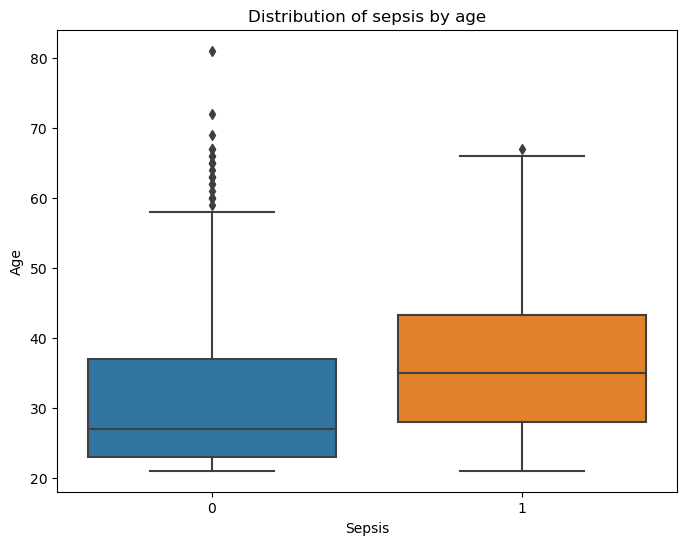

In [30]:
#create boxplot to show distribution of age by sepsis status
plt.figure(figsize=(8,6))
sns.boxplot(data=train_copy, x='Sepsis', y='Age')
plt.xlabel('Sepsis')
plt.ylabel('Age')
plt.title('Distribution of sepsis by age')
plt.show()


In [31]:
#grouping the sepsis into its various status
sepsis_positive=train_copy[train_copy['Sepsis']==1]
sepsis_negative=train_copy[train_copy['Sepsis']==0]

#assigning ages with positive and negative sepsis status 
age_postive=sepsis_positive['Age']
age_negative=sepsis_negative['Age']

#computing the various statistics
print('Max age for positive status:', age_postive.max())
print('Min age for positive status:', age_postive.min())
print('Mean age for positive status:', age_postive.mean())
print('Median age for positive status:', age_postive.median())

print('Max age for negative status:', age_negative.max())
print('Min age for negative status:', age_negative.min())
print('Mean age for negative status:', age_negative.mean())
print('Median age for negative status:', age_negative.median())




Max age for positive status: 67
Min age for positive status: 21
Mean age for positive status: 36.69711538461539
Median age for positive status: 35.0
Max age for negative status: 81
Min age for negative status: 21
Mean age for negative status: 31.47826086956522
Median age for negative status: 27.0


The computation above explains the boxplot which show the distribution of the sepsis status among the various ages.
From this we can say that the age range for positive sepsis status is approximately 37 years. 
Meaning people around that age are more likely to have sepsis.

#### Answering Q3.  Are the variations in the different blood work results?

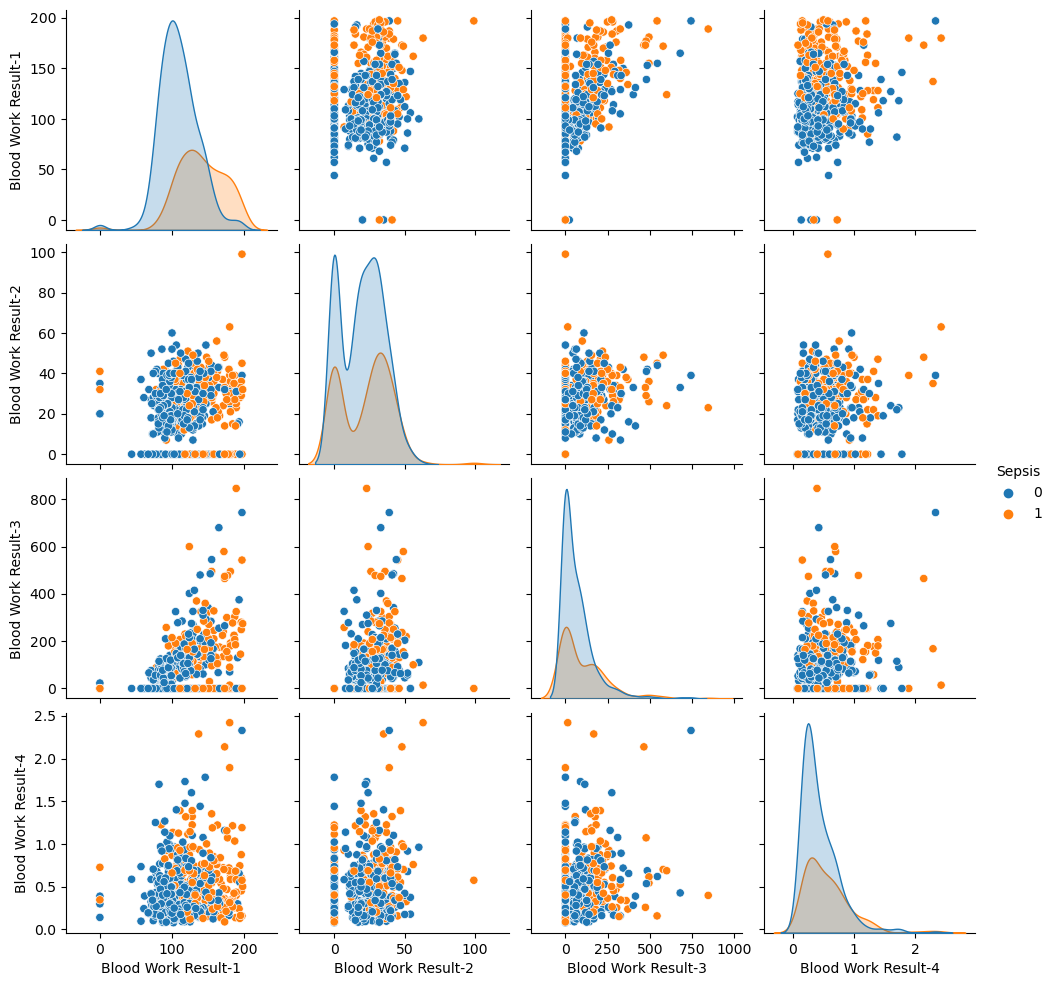

In [32]:
#graphical representation of the various blood results with sepsis
blood_results = ['Blood Work Result-1','Blood Work Result-2', 'Blood Work Result-3', 'Blood Work Result-4']
sns.pairplot(data=train_copy, vars=blood_results, hue='Sepsis')

In [33]:
train_copy['Blood Work Result-4'].mean()

0.4811869782971616

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [34]:
# We wil be using the main train data now

#Checking duplicates

train_data.duplicated().sum()

0

There are no duplicates

## Impute Missing Values

In [35]:
# Use sklearn.impute.SimpleImputer

#check for missing values

train_data.isnull().sum()

ID                     0
Plasma glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body mass index        0
Blood Work Result-4    0
Age                    0
Insurance              0
Sepsis                 0
dtype: int64

In [36]:
train_data.head()

,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


## Dataset Splitting

In [37]:
# Use train_test_split with a random_state, and add stratify for Classification

In [38]:
# drop ID and Insurance. Insurance is been dropped because the determination of sepsis is bodily related. 
train_data = train_data.drop(columns=['ID', 'Insurance'])
# train_data['Sepsis']

In [39]:
#  change values in sepsis column into numerical data
# train_data['Sepsis'] = (train_data['Sepsis'] == 'Positive').astype(bool).astype(int)
# train_data['Sepsis'].unique()

train_data['Sepsis'] = train_data['Sepsis'].map({'Positive': 1, 'Negative': 0})
train_data['Sepsis'].unique()

array([1, 0], dtype=int64)

In [40]:
#spliting data into  80% train and  20% test

train, test = train_test_split(train_data, test_size=0.2, random_state=42)

In [41]:
# check and confirm the shape of the train and test data
train.shape, test.shape

((479, 9), (120, 9))

In [42]:
# create features and targets from the train and test
X_train = train.drop(columns=['Sepsis'])
y_train = train['Sepsis'].copy()

X_eval = test.drop(columns=['Sepsis'])
y_eval = test['Sepsis'].copy()

In [43]:
# display head fo the train features dataframe
X_train.head()

,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age
145,0,102,75,23,0,0.0,0.572,21
9,8,125,96,0,0,0.0,0.232,54
375,12,140,82,43,325,39.2,0.528,58
522,6,114,0,0,0,0.0,0.189,26
188,8,109,76,39,114,27.9,0.640,31


In [44]:
# display head for the test features dataframe

X_eval.head()

,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age
110,3,171,72,33,135,33.3,0.199,24
419,3,129,64,29,115,26.4,0.219,28
564,0,91,80,0,0,32.4,0.601,27
77,5,95,72,33,0,37.7,0.370,27
181,0,119,64,18,92,34.9,0.725,23


## Create Pipeline to Impute Missing Values, Encode columns and Scale Columns

In [45]:
# check the number of misssing values in the train data
X_train.isnull().sum()

Plasma glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body mass index        0
Blood Work Result-4    0
Age                    0
dtype: int64

In [46]:
#creating train and eval numerical variable

train_num = X_train.columns

eval_num = X_eval.columns


In [47]:
#viewing the cols
train_num, eval_num

(Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
        'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
        'Blood Work Result-4', 'Age'],
       dtype='object'),
 Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
        'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
        'Blood Work Result-4', 'Age'],
       dtype='object'))

In [48]:
# create variables to hold numerical columns 
num_attribs = list(train_num)

In [49]:
#create a numerical pipeline to standardize and impute using median strategy for outliers in the numerical columns
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

In [50]:
# Create a fullpipeline for numerical pipeline
full_pipeline = ColumnTransformer([("numerical",num_pipeline, num_attribs)], remainder='passthrough')

In [51]:
# use create pipeline to transform train and eval features
X_train_prepared = full_pipeline.fit_transform(X_train)
X_eval_prepared = full_pipeline.transform(X_eval)

In [52]:
X_train_prepared

array([[-1.13431763, -0.5620614 ,  0.32794411, ..., -4.14403919,
         0.29869943, -1.04868446],
       [ 1.22289775,  0.16592243,  1.45189293, ..., -4.14403919,
        -0.76048427,  1.72609881],
       [ 2.40150545,  0.64069449,  0.70259372, ...,  0.91623232,
         0.1616286 ,  2.06243618],
       ...,
       [ 1.8122016 , -0.59371287,  0.91667921, ...,  1.7423991 ,
         2.05569826,  0.38074935],
       [-1.13431763,  0.67234596, -3.68615883, ...,  1.32931571,
        -0.84459591, -0.37600973],
       [-1.13431763,  0.16592243,  1.45189293, ..., -1.23954661,
        -0.66702688, -1.04868446]])

In [53]:
# Create a new datframe for the train and eval feature
labels = train_num
X_train_ = pd.DataFrame(X_train_prepared, columns=labels)
X_eval_ = pd.DataFrame(X_eval_prepared, columns=labels)

## Optional: Train Dataset Balancing 

In [54]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

In [55]:
# Count the number of unique values in the target
y_train.value_counts()

0    314
1    165
Name: Sepsis, dtype: int64

In [56]:
# Create an instance of SMOTE and fit it on the train feature and targets
sm = SMOTE(sampling_strategy='minority')
X_train_, y_train = sm.fit_resample(X_train_, y_train)

In [57]:
# let's confirm the increase in rows after oversampling
len(X_train_), len(y_train)

(628, 628)

In [58]:
# Confirm values counts for the targets
y_train.value_counts()

0    314
1    314
Name: Sepsis, dtype: int64

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Decision Tree

Please, keep the following structure to try all the model you want.

### Create the Model

In [59]:
# let's create a decision tree model
dclf = DecisionTreeClassifier()

### Train the Model

In [60]:
# Use the .fit method to train the model
dclf.fit(X_train_, y_train)

DecisionTreeClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

In [61]:
# Compute the valid metrics for the use case # Optional: show the classification report 

def evaluate_model(model, test, y_true):
    # Compute the valid metrics for the use case # Optional: show the classification report
    pred = model.predict(test)
    F1 = f1_score(y_true, pred)
    Recall = recall_score(y_true, pred)
    AUC = roc_auc_score(y_true, pred)
    
 
   
    return Recall, AUC, F1, pred

### Results of the model on train set

In [62]:
Recall_dclf, Auc_dclf, F1_dclf, dclf_pred = evaluate_model(dclf, X_train_, y_train)

In [63]:
train_results = pd.DataFrame([['Decision Tree Train', Recall_dclf, Auc_dclf, F1_dclf]], columns = ['Model', 'Recall', 'AUC','F1_score'])
train_results

,Model,Recall,AUC,F1_score
0,Decision Tree Train,1.0,1.0,1.0


### Results of the model on evaluation set

In [64]:
dclf_eval = DecisionTreeClassifier()
dclf_eval.fit(X_train_, y_train)

DecisionTreeClassifier()

In [65]:
Recall_dclf_eval, Auc_dclf_eval, F1_dclf_eval, dclf_eval_pred = evaluate_model(dclf_eval, X_eval_, y_eval)

In [66]:
eval_results = pd.DataFrame([['Decision Tree Eval', Recall_dclf_eval, Auc_dclf_eval, F1_dclf_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])
eval_results

combined_results_dclf= pd.concat([train_results, eval_results], ignore_index=True)
combined_results_dclf

,Model,Recall,AUC,F1_score
0,Decision Tree Train,1.000000,1.000000,1.000000
1,Decision Tree Eval,0.534884,0.624585,0.522727


### Predict on a unknown dataset (Testset)

In [67]:
# Use .predict method # .predict_proba is available just for classification

## RandomForest

### Create the Model

In [68]:
rfc = RandomForestClassifier()

In [69]:
# Use the .fit method
rfc.fit(X_train_, y_train)

RandomForestClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

### Results of the model on train set

In [70]:
Recall_rfc, Auc_rfc, F1_rfc, rfc_pred = evaluate_model(rfc, X_train_, y_train)

In [71]:



train_results1 = pd.DataFrame([['RandomForest Train', Recall_rfc, Auc_rfc, F1_rfc]], columns = ['Model', 'Recall', 'AUC','F1_score'])
train_results1

,Model,Recall,AUC,F1_score
0,RandomForest Train,1.0,1.0,1.0


### Results of the model on evaluation set

In [72]:
rfc_eval = RandomForestClassifier()

In [73]:
rfc_eval.fit(X_train_, y_train)

RandomForestClassifier()

In [74]:
Recall_rfc_eval, Auc_rfc_eval, F1_rfc_eval, rfc_eval_pred = evaluate_model(rfc_eval, X_eval_, y_eval)

In [75]:
eval_results1 = pd.DataFrame([['RandomForest Eval', Recall_rfc_eval, Auc_rfc_eval, F1_rfc_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])

eval_results1

combined_results_rfc= pd.concat([train_results1, eval_results1], ignore_index=True)

combined_results_rfc

,Model,Recall,AUC,F1_score
0,RandomForest Train,1.000000,1.000000,1.000000
1,RandomForest Eval,0.697674,0.712474,0.638298


## KNeighbors Classifier

### Create model

In [76]:
knn = KNeighborsClassifier()

### Train the Model

In [77]:
# Use the .fit method
knn.fit(X_train_, y_train)

KNeighborsClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

### Results of the model on train set

In [78]:
Recall_knn, Auc_knn, F1_knn, knn_pred = evaluate_model(knn, X_train_, y_train)



In [79]:
train_results2 = pd.DataFrame([['KNeighbors Train', Recall_knn, Auc_knn, F1_knn]], columns = ['Model', 'Recall', 'AUC','F1_score'])
train_results2

,Model,Recall,AUC,F1_score
0,KNeighbors Train,0.914013,0.859873,0.867069


In [80]:
# Compute the valid metrics for the use case # Optional: show the classification report 
# accuracy_knn, precision_knn, recall_knn, F1_knn, F2_knn, knn_pred = evaluate_model(knn, X_eval_, y_eval)

### Results of the model on evaluation set

In [81]:
knn_eval = KNeighborsClassifier()


In [82]:
knn_eval.fit(X_train_, y_train)

KNeighborsClassifier()

In [83]:
Recall_knn_eval, Auc_knn_eval, F1_knn_eval, knn_eval_pred = evaluate_model(knn_eval, X_eval_, y_eval)

In [84]:

eval_results2 = pd.DataFrame([['KNeighbors Eval', Recall_knn_eval, Auc_knn_eval, F1_knn_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])

eval_results2

combined_results_knn= pd.concat([train_results2, eval_results2], ignore_index=True)

combined_results_knn

,Model,Recall,AUC,F1_score
0,KNeighbors Train,0.914013,0.859873,0.867069
1,KNeighbors Eval,0.697674,0.673513,0.600000


### Predict on a unknown dataset (Testset)

In [85]:
# Use .predict method # .predict_proba is available just for classification

## Support Vector Machine

### Create model

In [86]:

svm = svm.SVC()

### Train model

In [87]:
# Use the .fit method

svm.fit(X_train_, y_train)

SVC()

### Evaluate the Model on the Evaluation dataset (Evalset)

### Results of the model on train set

In [88]:
Recall_svm, Auc_svm, F1_svm, svm_pred = evaluate_model(svm, X_train_, y_train)

In [89]:
train_results3 = pd.DataFrame([['SVM Train',Recall_svm, Auc_svm, F1_svm]], columns = ['Model', 'Recall', 'AUC','F1_score'])
train_results3

,Model,Recall,AUC,F1_score
0,SVM Train,0.859873,0.840764,0.84375


### Results of the model on evaluation set

In [90]:
Recall_svm_eval, Auc_svm_eval, F1_svm_eval, svm_eval_pred = evaluate_model(svm, X_eval_, y_eval)


In [91]:
eval_results3 = pd.DataFrame([['SVM Eval', Recall_svm_eval, Auc_svm_eval, F1_svm_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])

eval_results3

combined_results_SVM= pd.concat([train_results3, eval_results3], ignore_index=True)

combined_results_SVM

,Model,Recall,AUC,F1_score
0,SVM Train,0.859873,0.840764,0.843750
1,SVM Eval,0.674419,0.674872,0.597938


### Predict on a unknown dataset (Testset)

In [92]:
# Use .predict method # .predict_proba is available just for classification

## Logistic Regression

### Create model

In [93]:
 lgr_model = LogisticRegression()

### Train model

In [94]:
# Use the .fit method
lgr_model.fit(X_train_, y_train)

LogisticRegression()

### Evaluate the Model on the Evaluation dataset (Evalset)

### Results of the model on train set

In [95]:
Recall_lgr_model, Auc_lgr_model, F1_lgr_model, lgr_model_pred = evaluate_model(lgr_model, X_train_, y_train)

In [96]:
train_results4 = pd.DataFrame([['LGR Train', Recall_lgr_model, Auc_lgr_model, F1_lgr_model]], columns = ['Model', 'Recall', 'AUC','F1_score'])
train_results4

,Model,Recall,AUC,F1_score
0,LGR Train,0.764331,0.77707,0.774194


### Results of the model on evaluation set

In [97]:
Recall_lgr_model_eval, Auc_lgr_model_eval, F1_lgr_model_eval, lgr_model_eval_pred = evaluate_model(lgr_model, X_eval_, y_eval)

In [98]:
eval_results4 = pd.DataFrame([['LGR Eval', Recall_lgr_model_eval, Auc_lgr_model_eval, F1_lgr_model_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])

eval_results4

combined_results_LGR= pd.concat([train_results4, eval_results4], ignore_index=True)

combined_results_LGR

,Model,Recall,AUC,F1_score
0,LGR Train,0.764331,0.777070,0.774194
1,LGR Eval,0.697674,0.699487,0.625000


### Predict on a unknown dataset (Testset)

In [99]:
# Use .predict method # .predict_proba is available just for classification

In [100]:
Model_results=pd.concat([ combined_results_dclf, combined_results_rfc, combined_results_knn, combined_results_SVM, combined_results_LGR], ignore_index=True)

Model_results

,Model,Recall,AUC,F1_score
0,Decision Tree Train,1.000000,1.000000,1.000000
1,Decision Tree Eval,0.534884,0.624585,0.522727
2,RandomForest Train,1.000000,1.000000,1.000000
3,RandomForest Eval,0.697674,0.712474,0.638298
4,KNeighbors Train,0.914013,0.859873,0.867069
5,KNeighbors Eval,0.697674,0.673513,0.600000
6,SVM Train,0.859873,0.840764,0.843750
7,SVM Eval,0.674419,0.674872,0.597938
8,LGR Train,0.764331,0.777070,0.774194
9,LGR Eval,0.697674,0.699487,0.625000


## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [101]:
#combining all the trained models
Model_comparison=pd.concat([eval_results, eval_results1, eval_results2, eval_results3, eval_results4], ignore_index=True)
Model_comparison

,Model,Recall,AUC,F1_score
0,Decision Tree Eval,0.534884,0.624585,0.522727
1,RandomForest Eval,0.697674,0.712474,0.638298
2,KNeighbors Eval,0.697674,0.673513,0.600000
3,SVM Eval,0.674419,0.674872,0.597938
4,LGR Eval,0.697674,0.699487,0.625000


In [102]:
#renaming model names

replacement_mapping = {'Decision Tree Eval': 'DecisionTree Classifier', 
                       'RandomForest Eval':'RandomForest Classifier','KNeighbors Eval': 'KNeighbors' ,
                       'SVM Eval':'Support Vector Machine', 'LGR Eval':'Logistic Regression'}

Model_comparison['Model'] = Model_comparison['Model'].replace(replacement_mapping)



In [103]:
Model_comparison

,Model,Recall,AUC,F1_score
0,DecisionTree Classifier,0.534884,0.624585,0.522727
1,RandomForest Classifier,0.697674,0.712474,0.638298
2,KNeighbors,0.697674,0.673513,0.600000
3,Support Vector Machine,0.674419,0.674872,0.597938
4,Logistic Regression,0.697674,0.699487,0.625000


In [104]:
#
Model_comparison=  Model_comparison.sort_values(by='Recall', ascending=False)
Model_comparison.set_index('Model', inplace =True)

Model_comparison

,Recall,AUC,F1_score
Model,,,
RandomForest Classifier,0.697674,0.712474,0.638298
KNeighbors,0.697674,0.673513,0.600000
Logistic Regression,0.697674,0.699487,0.625000
Support Vector Machine,0.674419,0.674872,0.597938
DecisionTree Classifier,0.534884,0.624585,0.522727


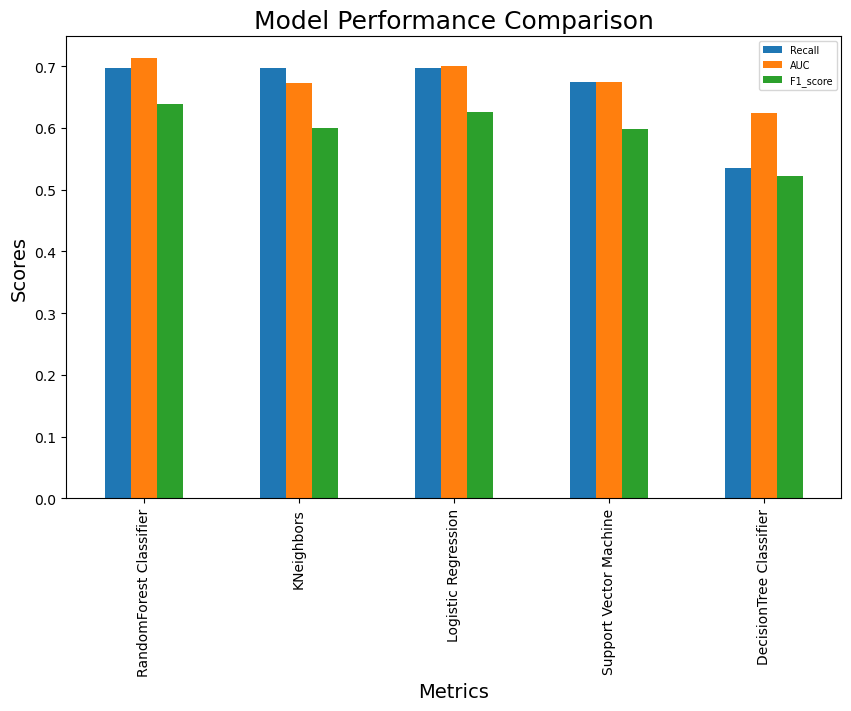

In [105]:
# plot the bar chart
ax = Model_comparison.plot(kind='bar', figsize=(10, 6))

# set the title and labels
ax.set_title('Model Performance Comparison', fontsize=18)
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)

# set the legend
ax.legend(fontsize=7)

# show the plot
plt.show()

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

### Support Vector Machine

In [106]:
# defining parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.698 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.802 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [107]:
 #print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [108]:
def hyper_model(grid, test, y_true):
    # Compute the valid metrics for the use case # Optional: show the classification report
    grid_predictions = grid.predict(test)
    F1 = f1_score(y_true, grid_predictions)
    Recall = recall_score(y_true, grid_predictions)
    AUC = roc_auc_score(y_true, grid_predictions)
    
 
   
    return Recall, AUC, F1, grid_predictions

In [109]:
Recall_svm, Auc_svm, F1_svm, svm_grid_predictions = hyper_model(grid, X_eval_, y_eval)

In [110]:
hyper_results = pd.DataFrame([['Support Vector Machine', Recall_svm, Auc_svm, F1_svm]], columns = ['Model', 'Recall', 'AUC','F1_score'])

hyper_results

,Model,Recall,AUC,F1_score
0,Support Vector Machine,0.488372,0.666264,0.552632


In [111]:
# grid_predictions = grid.predict(X_eval_)
  
# # print classification report
# print(classification_report(y_eval, grid_predictions))

In [112]:
# eval_results3 = pd.DataFrame([['SVM Eval', Recall_svm_eval, Auc_svm_eval, F1_svm_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])

# eval_results3

### Logistic Regression

In [113]:
#defining parameter grid
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000],
}


grid_lgr= GridSearchCV(lgr_model, params, cv=5, verbose=1)

# fitting the model for grid search
grid_lgr.fit(X_train_, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=1)

In [114]:
 #print best parameter after tuning
print(grid_lgr.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_lgr.best_estimator_)

{'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
LogisticRegression(C=1, solver='liblinear')


In [115]:
Recall_lgr_model, Auc_lgr_model, F1_lgr_model, lgr_model_grid_predictions = hyper_model(grid_lgr, X_eval_, y_eval)

In [116]:
hyper_results1 = pd.DataFrame([['Logistic Regression', Recall_lgr_model, Auc_lgr_model, F1_lgr_model]], columns = ['Model', 'Recall', 'AUC','F1_score'])

hyper_results1

,Model,Recall,AUC,F1_score
0,Logistic Regression,0.697674,0.699487,0.625


### KNeighbors

In [117]:
# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}


grid_knn = GridSearchCV(knn, param_grid, cv=5)

# fitting the model for grid search
grid_knn.fit(X_train_, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [118]:
 #print best parameter after tuning
print(grid_knn.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_knn.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')


In [119]:
Recall_knn, Auc_knn, F1_knn, knn_grid_predictions = hyper_model(grid_knn, X_eval_, y_eval)

In [120]:
hyper_results2 = pd.DataFrame([['KNeighbors', Recall_knn, Auc_knn, F1_knn]], columns = ['Model', 'Recall', 'AUC','F1_score'])

hyper_results2

,Model,Recall,AUC,F1_score
0,KNeighbors,0.674419,0.635911,0.563107


### RandomForest

In [121]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}

grid_rfc = GridSearchCV(rfc, param_grid, cv=3)

# fitting the model for grid search
grid_rfc.fit(X_train_, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [122]:
#print best parameter after tuning
print(grid_rfc.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_rfc.best_estimator_)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_features='auto', n_estimators=200)


In [123]:
Recall_rfc, Auc_rfc, F1_rfc, knn_grid_predictions = hyper_model(grid_knn, X_eval_, y_eval)

In [124]:
hyper_results3 = pd.DataFrame([['RandomForest', Recall_rfc, Auc_rfc, F1_rfc]], columns = ['Model', 'Recall', 'AUC','F1_score'])

hyper_results3

,Model,Recall,AUC,F1_score
0,RandomForest,0.674419,0.635911,0.563107


### DecisionTree

In [133]:
param_grid =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]
}
grid_dclf = GridSearchCV(dclf,param_grid,cv=10,verbose=2)
                    
                    
            
                    


In [134]:
grid_dclf.fit(X_train_, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.1s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=1, min_sa

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3]},
             verbose=2)

In [145]:
#print best parameter after tuning
print(grid_dclf.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_dclf.best_estimator_)

{'max_depth': 3, 'min_samples_leaf': 1}
DecisionTreeClassifier(max_depth=3)


In [138]:
Recall_dclf, Auc_dclf, F1_dclf, dclf_grid_predictions = hyper_model(grid_dclf, X_eval_, y_eval)

In [139]:
hyper_results4 = pd.DataFrame([['DecisionTree', Recall_dclf, Auc_dclf, F1_dclf]], columns = ['Model', 'Recall', 'AUC','F1_score'])

hyper_results4

,Model,Recall,AUC,F1_score
0,DecisionTree,0.813953,0.647236,0.59322


### Combining tuned models

In [140]:
#combining all the tuned models
Hyper_results=pd.concat([hyper_results, hyper_results1, hyper_results2, hyper_results3, hyper_results4], ignore_index=True)
Hyper_results

,Model,Recall,AUC,F1_score
0,Support Vector Machine,0.488372,0.666264,0.552632
1,Logistic Regression,0.697674,0.699487,0.625000
2,KNeighbors,0.674419,0.635911,0.563107
3,RandomForest,0.674419,0.635911,0.563107
4,DecisionTree,0.813953,0.647236,0.593220


In [143]:
#Results before performing hyperparameter tuning

Model_comparison

,Recall,AUC,F1_score
Model,,,
RandomForest Classifier,0.697674,0.712474,0.638298
KNeighbors,0.697674,0.673513,0.600000
Logistic Regression,0.697674,0.699487,0.625000
Support Vector Machine,0.674419,0.674872,0.597938
DecisionTree Classifier,0.534884,0.624585,0.522727


In [141]:
#Results after performing hyperparameter tuning
Hyper_results=  Hyper_results.sort_values(by='Recall', ascending=False)
Hyper_results.set_index('Model', inplace =True)

Hyper_results

,Recall,AUC,F1_score
Model,,,
DecisionTree,0.813953,0.647236,0.593220
Logistic Regression,0.697674,0.699487,0.625000
KNeighbors,0.674419,0.635911,0.563107
RandomForest,0.674419,0.635911,0.563107
Support Vector Machine,0.488372,0.666264,0.552632


# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [144]:
import pickle

In [146]:
# Put the key components in a dictionary
model_dict = {"model": grid_dclf.best_estimator_, "pipeline": full_pipeline, "num_pipe":num_pipeline}

In [147]:
# Save the dictionary as a pickle file
with open("sepsis.pkl", "wb") as f:
      pickle.dump(model_dict, f)